In [1]:
!pip install ultralytics
!pip install matplotlib
!pip install pyyaml




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [2]:
import os
import zipfile
import random
from collections import Counter
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files
import cv2
import glob
import random



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Facilitates uploading a ZIP file in Google Colab, extracting its contents to a specified directory, and returning the path to the extracted dataset. It also displays a confirmation message and lists the files and folders inside the destination directory.

In [3]:
def upload_and_extract_zip_colab(extract_to="/content/dataset"):
    """
    Prompts the user to upload a ZIP file in Google Colab and extracts it to the specified directory.

    Parameters:
        extract_to (str): Path where the ZIP file will be extracted. Default is '/content/dataset'.

    Returns:
        str: The path to the extracted dataset directory.
    """
    # Step 1: Prompt user to upload a ZIP file
    print("Please upload your dataset ZIP file:")
    uploaded = files.upload()  # Opens the file upload dialog in Google Colab

    # Step 2: Identify the uploaded ZIP file name
    zip_filename = list(uploaded.keys())[0]

    # Step 3: Create the destination directory if it doesn't exist
    os.makedirs(extract_to, exist_ok=True)

    # Step 4: Extract the contents of the ZIP file
    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    # Step 5: Print and return the dataset path
    print(f"✅ File '{zip_filename}' successfully extracted to '{extract_to}'.")
    print("Files and Folders:", os.listdir(extract_to))
    return extract_to


 Define the extraction directory for a dataset in Colab, extract the contents of a ZIP file, and display the path to the extracted dataset directory.

In [4]:
# Define the extraction directory (you can adjust this)
dataset_path = upload_and_extract_zip_colab("/content/dataset")

# Now `dataset_path` contains the path to the extracted dataset directory
print("Dataset Directory:", dataset_path)


Please upload your dataset ZIP file:


Saving Hard Hat Workers.v2-raw_75-25_traintestsplit.yolov8.zip to Hard Hat Workers.v2-raw_75-25_traintestsplit.yolov8.zip
✅ File 'Hard Hat Workers.v2-raw_75-25_traintestsplit.yolov8.zip' successfully extracted to '/content/dataset'.
Files and Folders: ['train', 'README.dataset.txt', 'data.yaml', 'test', 'README.roboflow.txt']
Dataset Directory: /content/dataset


Structured dataset and retrieves important metadata (e.g., class names) to facilitate further processing



This code performs the following tasks:

1. **Define the `load_yaml` Function:**
   - The `load_yaml` function is designed to open a YAML file from a specified path and load its contents into a format that Python can work with.
   - It uses the `yaml.safe_load()` method, which ensures that the YAML file is read in a safe and reliable way.

2. **Load the YAML File:**
   - After defining the function, it is used to load a YAML configuration file located at `yaml_path`. This file typically contains structured data or settings relevant to the program.

3. **Display the Loaded Data:**
   - The contents of the loaded YAML file are displayed using the `display()` function to verify its structure and ensure that the data has been loaded correctly.

**Purpose of the Code:**
This code is useful for reading and working with configuration data stored in a YAML file. It ensures that the file's contents are safely loaded and available for use in tasks such as training models or organizing dataset metadata.


In [7]:

def load_yaml(yaml_path):
    """
    Loads the YAML configuration file.
    """
    with open(yaml_path, "r") as file:
        data_yaml = yaml.safe_load(file)
    return data_yaml
data_yaml = load_yaml(yaml_path)
display(data_yaml)
zip_path = "/content/Hard Hat Workers.v2-raw_75-25_traintestsplit.yolov8.zip"
extract_to = "/content/dataset"
yaml_path = os.path.join(extract_to, "data.yaml")
labels_path = os.path.join(extract_to, "train", "labels")
train_images_path = os.path.join(extract_to, "train", "images")
val_images_path = os.path.join(extract_to, "test", "images")
test_images_path = os.path.join(extract_to, "test", "images")


# Load YAML configuration
data_yaml = load_yaml(yaml_path)
class_names = data_yaml["names"]






{'train': '../train/images',
 'val': '../valid/images',
 'test': '../test/images',
 'nc': 3,
 'names': ['head', 'helmet', 'person'],
 'roboflow': {'workspace': 'joseph-nelson',
  'project': 'hard-hat-workers',
  'version': 2,
  'license': 'Public Domain',
  'url': 'https://universe.roboflow.com/joseph-nelson/hard-hat-workers/dataset/2'}}

## Counting Class Distribution

This code counts how many times each class appears in the dataset by reading label files. It processes each file, extracts the class IDs, converts them to class names, and keeps track of their counts. Finally, it prints the distribution of classes in the dataset.



In [8]:
def count_class_distribution(labels_path, class_names):
    """
    Counts the distribution of each class in the dataset.
    """
    class_counts = Counter()
    for label_file in os.listdir(labels_path):
        with open(os.path.join(labels_path, label_file), "r") as f:
            for line in f:
                class_id = int(line.split()[0])
                class_counts[class_names[class_id]] += 1
    return class_counts
initial_distribution = count_class_distribution(labels_path, class_names)
print("Initial Class Distribution:", initial_distribution)



Initial Class Distribution: Counter({'helmet': 14884, 'head': 4874, 'person': 473})


## Plotting Class Distribution

This code creates a bar chart to visually represent the class distribution in the dataset. It takes the class counts and a title as input, and plots the number of instances for each class using a labeled and clear layout.


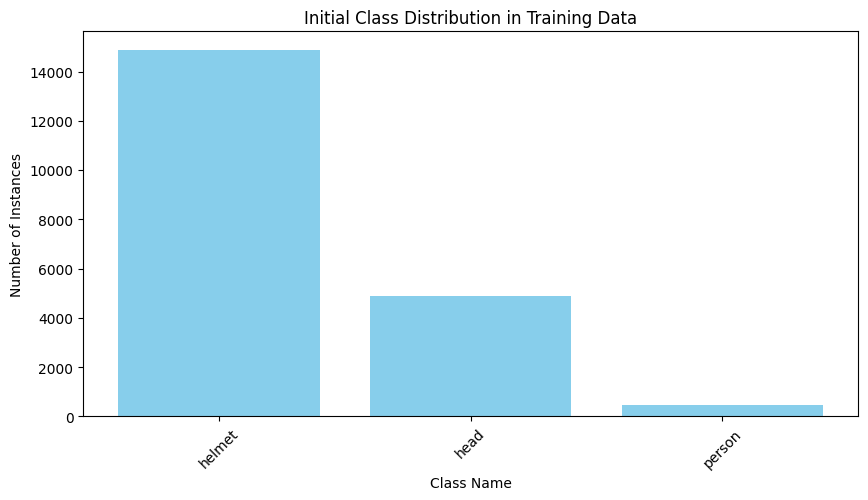

In [9]:
def plot_class_distribution(class_counts, title):
    """
    Plots the class distribution.
    """
    plt.figure(figsize=(10, 5))
    plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
    plt.xlabel("Class Name")
    plt.ylabel("Number of Instances")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()
plot_class_distribution(initial_distribution, "Initial Class Distribution in Training Data")

## Balancing the Dataset

This code balances the dataset by reducing the number of instances in the majority class (downsampling). It works as follows:

1. Reads label files from the dataset to identify and process annotations.
2. Removes annotations of the majority class (`person`) and calculates class distribution after removal.
3. Selectively downsamples the `helmet` class to match the count of the `head` class.
4. Updates the label files with the adjusted annotations.
5. Returns the final balanced class distribution and displays it using a bar chart.

This ensures that the dataset has a more even representation of classes, reducing bias during model training.


Final Class Distribution: Counter({'helmet': 4874, 'head': 4874})


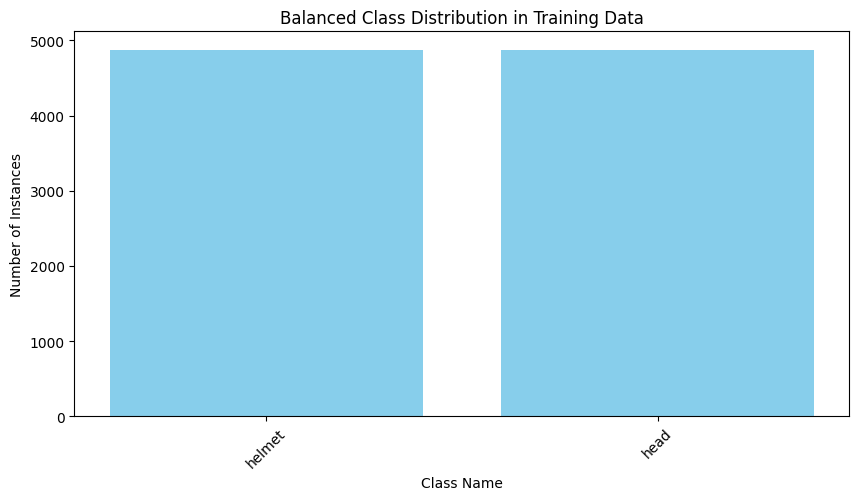

In [10]:
def balance_dataset(labels_path, class_names):
    """
    Balances the dataset by downsampling the majority class.
    """
    annotations = {}
    helmet_records = []

    for label_file in os.listdir(labels_path):
        file_path = os.path.join(labels_path, label_file)
        with open(file_path, "r") as f:
            lines = f.readlines()

        new_lines = []
        for line in lines:
            parts = line.split()
            if not parts:
                continue
            class_id = int(parts[0])
            if class_names[class_id] == "person":
                continue
            new_lines.append(line)
            if class_names[class_id] == "helmet":
                helmet_records.append((label_file, len(new_lines) - 1))

        annotations[label_file] = new_lines

    dist_after_removal = Counter()
    for lines in annotations.values():
        for line in lines:
            parts = line.split()
            if parts:
                class_id = int(parts[0])
                dist_after_removal[class_names[class_id]] += 1

    helmet_count = dist_after_removal["helmet"]
    head_count = dist_after_removal["head"]
    target = head_count

    if target > len(helmet_records):
        print("Warning: Target exceeds available helmet labels!")
        target = len(helmet_records)
    selected_helmet = set(random.sample(helmet_records, target))

    for label_file, lines in annotations.items():
        filtered_lines = []
        for idx, line in enumerate(lines):
            parts = line.split()
            if not parts:
                continue
            class_id = int(parts[0])
            if class_names[class_id] == "helmet":
                if (label_file, idx) in selected_helmet:
                    filtered_lines.append(line)
            else:
                filtered_lines.append(line)
        annotations[label_file] = filtered_lines

    for label_file, lines in annotations.items():
        file_path = os.path.join(labels_path, label_file)
        with open(file_path, "w") as f:
            f.writelines(lines)

    final_distribution = Counter()
    for label_file in os.listdir(labels_path):
        file_path = os.path.join(labels_path, label_file)
        with open(file_path, "r") as f:
            for line in f:
                parts = line.split()
                if parts:
                    class_id = int(parts[0])
                    final_distribution[class_names[class_id]] += 1

    return final_distribution
final_distribution = balance_dataset(labels_path, class_names)
print("Final Class Distribution:", final_distribution)
plot_class_distribution(final_distribution, "Balanced Class Distribution in Training Data")


## Updating the YAML Configuration

This code updates a YAML configuration file with new dataset paths and class names. It performs the following:

1. Creates a new YAML content structure with:
   - Paths for training, validation, and test datasets.
   - The number of classes (`nc`) and their names (`names`).

2. Writes the updated content back to the specified YAML file (`yaml_path`).

3. Prints a confirmation message upon successful update.

This ensures that the configuration file is updated to match the current dataset structure.


In [11]:
def update_yaml(yaml_path, train_path, val_path, test_path, class_names):
    """
    Updates the YAML configuration file with new paths and class names.
    """
    new_yaml_content = {
        "train": train_path,
        "val": val_path,
        "test": test_path,
        "nc": len(class_names),
        "names": class_names
    }
    with open(yaml_path, "w") as file:
        yaml.dump(new_yaml_content, file, default_flow_style=False)
    print(f"✅ Updated {yaml_path} successfully!")
updated_yaml_path = "my_data.yaml"
updated_class_names = ["head", "helmet"]
update_yaml(updated_yaml_path, train_images_path, val_images_path, test_images_path, updated_class_names)



✅ Updated my_data.yaml successfully!


## Training the YOLOv8 Model

This code trains a YOLOv8 model using the specified dataset and parameters. Here's what it does:

1. **Model Initialization:**  
   - The YOLO model is loaded using the pre-trained weights from `model_path` (default is "yolov8n.pt").

2. **Training Configuration:**  
   - The `train` method is called with various training parameters, including:
     - Number of epochs (`epochs=200`)
     - Image size (`imgsz=1536`)
     - Batch size (`batch=16`)
     - Early stopping patience (`patience=30`)
     - Learning rate (`lr0=1e-4`)
     - Optimizer (`Adam`) and augmentation techniques (e.g., `mixup`, `degrees`, `shear`)
     - Cosine learning rate scheduler (`cos_lr=True`).

3. **Training Execution:**  
   - The model trains on the dataset specified in the `data_yaml` file using the given parameters.

4. **Completion Message:**  
   - A confirmation message is printed once training is completed.

The result is a YOLOv8 model trained and ready for evaluation or deployment.


In [12]:
def train_yolo(data_yaml, model_path="yolov8n.pt", epochs=50):
    """
    Trains the YOLOv8 model using the provided data and parameters.
    """

    model = YOLO(model_path)
    model.train(
        data=data_yaml,
        epochs=100,            # Total number of training epochs
        imgsz=1536,            # Image size
        batch=16,              # Batch size
        patience=10,           # Early stopping patience
        freeze=10,             # Number of layers to freeze
        lr0=1e-4,              # Initial learning rate
        optimizer='Adam',      # Optimizer choice
        mixup=0.2,             # MixUp augmentation probability
        degrees=10.0,          # Rotation augmentation
        shear=2.0,             # Shear augmentation
        cos_lr=True            # Use cosine learning rate scheduler
)

    print("✅ Model training completed.")
    return model

## Main Function Overview

This `main` function orchestrates the workflow for training, validating, testing, and exporting a YOLOv8 model. Here's what it does:

1. **Train and Validate the Model:**
   - Calls the `train_yolo` function to train the YOLOv8 model using the specified YAML configuration file and parameters.
   - Validates the trained model by running `model.val()` to check its performance on the validation dataset.

2. **Test the Model:**
   - Uses `model.predict` to make predictions on new test images, saving the results for later review.

3. **Export the Model:**
   - Exports the trained YOLOv8 model in two formats:
     - `onnx` (Open Neural Network Exchange) for interoperability.
     - `engine` format, possibly for deployment on platforms like TensorRT.

4. **Execution:**
   - If the script is run directly (`__name__ == "__main__"`), the `main` function is executed.

This function integrates the key stages of the model's lifecycle, from training to deployment.


In [13]:
def main():
    # Validate the model
    model = train_yolo(updated_yaml_path, model_path="yolov8n.pt", epochs=100)
    model.val()

    # Test on new images
    results = model.predict(source=test_images_path, save=True)

    # Export the model (Optional for Deployment)
    model.export(format="onnx")
    model.export(format="engine")

if __name__ == "__main__":
    main()

100%|██████████| 6.25M/6.25M [00:00<00:00, 73.4MB/s]


Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=my_data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=1536, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 62.6MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 5269 images, 1750 backgrounds, 0 corrupt: 100%|██████████| 5269/5269 [00:03<00:00, 1696.13it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/test/labels... 1766 images, 0 backgrounds, 45 corrupt: 100%|██████████| 1766/1766 [00:01<00:00, 1207.03it/s]

val: WARNING ⚠️ /content/dataset/test/images/005304_jpg.rf.68023ed553bb1d711826d6e1f185ea39.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/dataset/test/images/005335_jpg.rf.747d6f6b89717d5f35d0b785c27bb6d8.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/dataset/test/images/005363_jpg.rf.b6104e4bdaf80defdf9e72f69722ba1b.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/dataset/test/images/005418_jpg.rf.aade4f47f50d3cc85898c94a8ecf5853.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/dataset/test/images/005429_jpg.rf.03d5c9f2fe7a9318bf4cd52f15f468a4.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class label

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.0001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1536 train, 1536 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.21G      1.549      2.436      1.401         15       1536: 100%|██████████| 330/330 [01:26<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.64it/s]


                   all       1721       6523      0.548       0.79      0.807      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.45G      1.431      1.753      1.318          7       1536: 100%|██████████| 330/330 [01:22<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.04it/s]


                   all       1721       6523       0.81      0.835      0.896      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.94G      1.396      1.588      1.295         22       1536: 100%|██████████| 330/330 [01:24<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:09<00:00,  5.41it/s]


                   all       1721       6523      0.846      0.852      0.918      0.535

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.15G       1.36      1.503      1.282         25       1536: 100%|██████████| 330/330 [01:22<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.06it/s]


                   all       1721       6523      0.835      0.875      0.922      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.02G      1.353      1.463      1.273          8       1536: 100%|██████████| 330/330 [01:23<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.19it/s]

                   all       1721       6523      0.875      0.869      0.932      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       5.9G      1.342       1.43      1.264         18       1536: 100%|██████████| 330/330 [01:22<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.03it/s]

                   all       1721       6523      0.881      0.876      0.932       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.31G      1.329      1.387      1.258         13       1536: 100%|██████████| 330/330 [01:22<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.00it/s]

                   all       1721       6523      0.834      0.875      0.934       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.83G      1.321      1.359      1.255         24       1536: 100%|██████████| 330/330 [01:24<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.37it/s]

                   all       1721       6523      0.843      0.898       0.94      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       5.9G      1.322       1.37      1.266         22       1536: 100%|██████████| 330/330 [01:24<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.08it/s]

                   all       1721       6523      0.852      0.904      0.939       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.07G      1.301      1.332      1.239         17       1536: 100%|██████████| 330/330 [01:22<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.24it/s]

                   all       1721       6523      0.846      0.895      0.937      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.32G      1.314      1.341      1.251         19       1536: 100%|██████████| 330/330 [01:24<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.37it/s]


                   all       1721       6523      0.847      0.911      0.946      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.85G      1.296      1.324      1.241         10       1536: 100%|██████████| 330/330 [01:24<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.29it/s]

                   all       1721       6523      0.851      0.899      0.947      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.91G      1.294      1.309      1.241         18       1536: 100%|██████████| 330/330 [01:23<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.16it/s]

                   all       1721       6523      0.858      0.909      0.948      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.84G      1.288      1.276      1.239         10       1536: 100%|██████████| 330/330 [01:21<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.15it/s]

                   all       1721       6523      0.883        0.9       0.95      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.87G      1.287      1.264      1.235         33       1536: 100%|██████████| 330/330 [01:22<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.00it/s]

                   all       1721       6523      0.864       0.91      0.948      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.89G      1.276       1.28      1.231         14       1536: 100%|██████████| 330/330 [01:25<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:09<00:00,  5.43it/s]


                   all       1721       6523      0.825      0.913      0.942      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.81G      1.273      1.259      1.235         14       1536: 100%|██████████| 330/330 [01:23<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.37it/s]

                   all       1721       6523      0.838      0.915       0.95      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.81G      1.272      1.267      1.233         16       1536: 100%|██████████| 330/330 [01:23<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.03it/s]

                   all       1721       6523       0.89      0.905      0.954      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.76G      1.277      1.265      1.226         37       1536: 100%|██████████| 330/330 [01:22<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.08it/s]

                   all       1721       6523      0.845      0.909      0.953      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.63G      1.272      1.252      1.229         17       1536: 100%|██████████| 330/330 [01:21<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.15it/s]

                   all       1721       6523      0.874       0.92      0.954      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.73G      1.269      1.225      1.231         26       1536: 100%|██████████| 330/330 [01:23<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.14it/s]

                   all       1721       6523      0.876      0.917      0.954      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.42G      1.269      1.239      1.222          9       1536: 100%|██████████| 330/330 [01:25<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.25it/s]

                   all       1721       6523      0.896      0.911      0.955      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.89G       1.26       1.22      1.219         12       1536: 100%|██████████| 330/330 [01:23<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.29it/s]

                   all       1721       6523      0.885      0.913      0.952      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       5.8G      1.259      1.234      1.219          8       1536: 100%|██████████| 330/330 [01:22<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.19it/s]

                   all       1721       6523      0.892      0.911      0.954      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       5.9G      1.254        1.2      1.213         25       1536: 100%|██████████| 330/330 [01:23<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.17it/s]

                   all       1721       6523       0.88      0.921      0.956      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       5.8G      1.262      1.211      1.219         13       1536: 100%|██████████| 330/330 [01:24<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.25it/s]

                   all       1721       6523      0.896      0.919      0.957      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.97G      1.262      1.218      1.216          9       1536: 100%|██████████| 330/330 [01:22<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.12it/s]

                   all       1721       6523      0.874      0.923      0.955      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.89G      1.254      1.215      1.214         28       1536: 100%|██████████| 330/330 [01:23<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  4.96it/s]

                   all       1721       6523      0.883      0.916      0.954      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.67G      1.247      1.194      1.212         16       1536: 100%|██████████| 330/330 [01:21<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.05it/s]

                   all       1721       6523      0.891      0.913      0.959      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.88G      1.257      1.211      1.221         11       1536: 100%|██████████| 330/330 [01:22<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.30it/s]

                   all       1721       6523      0.894      0.919      0.959      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.79G      1.245      1.195      1.213         24       1536: 100%|██████████| 330/330 [01:22<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.19it/s]

                   all       1721       6523      0.882      0.919      0.957      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.26G      1.241      1.191      1.211         28       1536: 100%|██████████| 330/330 [01:23<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.37it/s]

                   all       1721       6523      0.889      0.928      0.955      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       5.8G      1.243      1.194      1.205         26       1536: 100%|██████████| 330/330 [01:21<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:10<00:00,  5.08it/s]

                   all       1721       6523      0.897      0.918      0.956      0.589
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 23, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



33 epochs completed in 0.867 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 54/54 [00:11<00:00,  4.68it/s]


                   all       1721       6523      0.885      0.913      0.952      0.604
                  head        333       1793      0.822      0.958      0.956      0.633
                helmet       1559       4730      0.949      0.869      0.948      0.574
Speed: 0.5ms preprocess, 1.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train
✅ Model training completed.
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/test/labels.cache... 1766 images, 0 backgrounds, 45 corrupt: 100%|██████████| 1766/1766 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/dataset/test/images/005304_jpg.rf.68023ed553bb1d711826d6e1f185ea39.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/dataset/test/images/005335_jpg.rf.747d6f6b89717d5f35d0b785c27bb6d8.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/dataset/test/images/005363_jpg.rf.b6104e4bdaf80defdf9e72f69722ba1b.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/dataset/test/images/005418_jpg.rf.aade4f47f50d3cc85898c94a8ecf5853.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class labels are 0-1
val: WARNING ⚠️ /content/dataset/test/images/005429_jpg.rf.03d5c9f2fe7a9318bf4cd52f15f468a4.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 2. Possible class label


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 108/108 [00:14<00:00,  7.46it/s]


                   all       1721       6523      0.885      0.914      0.952      0.604
                  head        333       1793      0.823      0.958      0.956      0.633
                helmet       1559       4730      0.947       0.87      0.948      0.575
Speed: 0.9ms preprocess, 2.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1766 /content/dataset/test/images/005298_jpg.rf.647d148af5d961d

In [25]:

# Save the model
model.save('best_model.pt')


NameError: name 'model' is not defined

## Displaying an Image

This code loads an image from a given file path and displays it using Matplotlib. Here's how it works:

1. **Image Loading:**
   - It uses OpenCV to load the image from `image_path`.

2. **Error Handling:**
   - If the image fails to load, it prints an error message and exits.

3. **Color Conversion:**
   - Converts the image from BGR format (used by OpenCV) to RGB format (used by Matplotlib).

4. **Image Display:**
   - Displays the image in a Matplotlib plot with axes hidden for

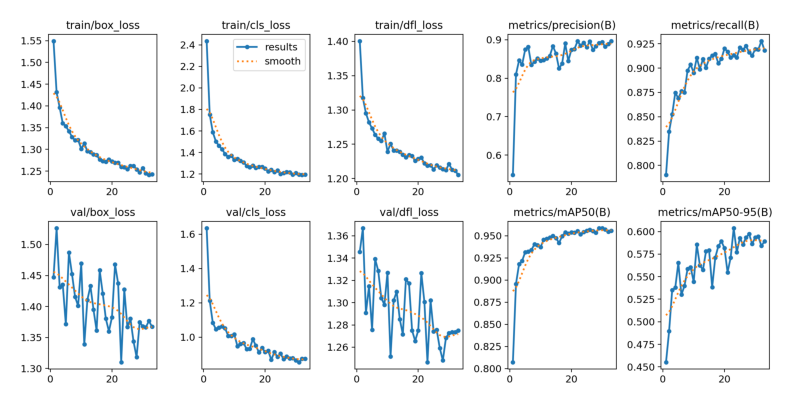

In [15]:
def display_image(image_path):
    """
    Loads an image from the specified path and displays it using Matplotlib.

    Args:
        image_path (str): The file path to the image.

    Returns:
        None
    """
    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Check if the image was successfully loaded
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image using Matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(img_rgb)
    plt.axis("off")  # Hide axis
    plt.show()
# Specify the path to your image
image_path = "runs/detect/train/results.png"

# Call the function to display the image
display_image(image_path)



## Performing Inference

Inference refers to the process of using a trained model to make predictions or detect patterns in new, unseen data. This is a critical stage in deploying machine learning models and testing their practical applications.

### Key Steps in Inference:
1. **Input Data:** Provide new data (e.g., images or text) to the trained model for evaluation.
2. **Model Predictions:** The model processes the input data and generates predictions or insights based on its learned knowledge.
3. **Analysis and Output:** Interpret and visualize the results to evaluate the model's performance or extract valuable information.

### In the Context of This Code:
The provided code demonstrates how to perform inference with a trained YOLO model:
- It uses the `train_yolo` function to train and validate the model.
- The `model.predict` function applies the trained model to a set of new images (test data).
- Outputs like predicted labels or bounding boxes are generated and saved for review.
- Optionally, the model is exported in formats such as `onnx` or `engine` for deployment.

This ensures the model's capability to generalize to unseen data and its readiness for real-world applications.


Loaded class names: ['head', 'helmet']

0: 1536x1536 9 helmets, 5.0ms
1: 1536x1536 1 helmet, 5.0ms
2: 1536x1536 (no detections), 5.0ms
3: 1536x1536 1 helmet, 5.0ms
4: 1536x1536 1 helmet, 5.0ms
5: 1536x1536 (no detections), 5.0ms
6: 1536x1536 1 helmet, 5.0ms
7: 1536x1536 1 helmet, 5.0ms
8: 1536x1536 1 helmet, 5.0ms
9: 1536x1536 8 heads, 5.0ms
Speed: 12.1ms preprocess, 5.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1536, 1536)


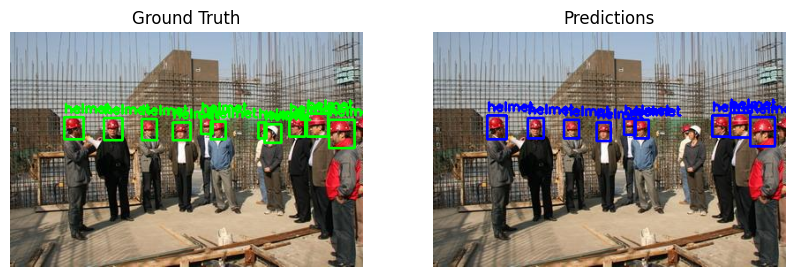

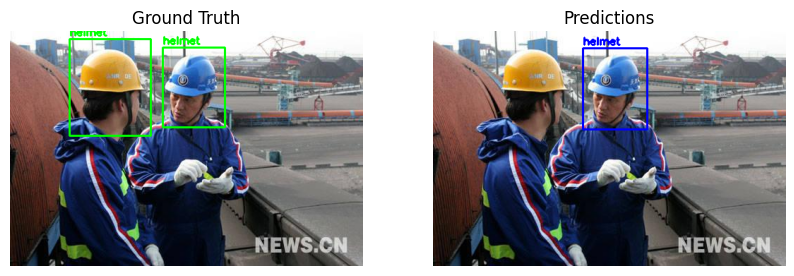

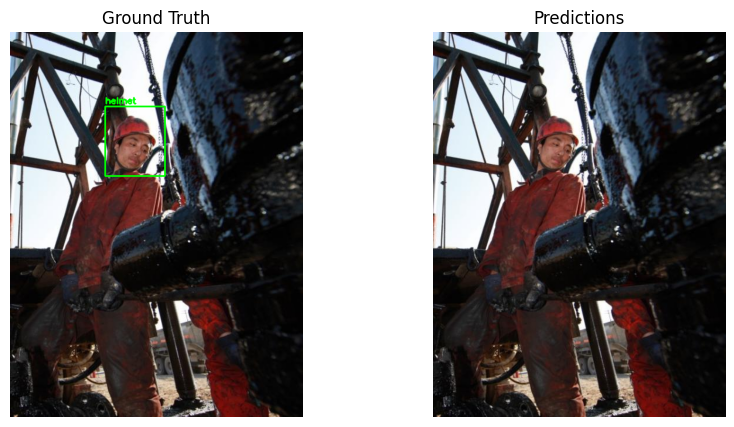

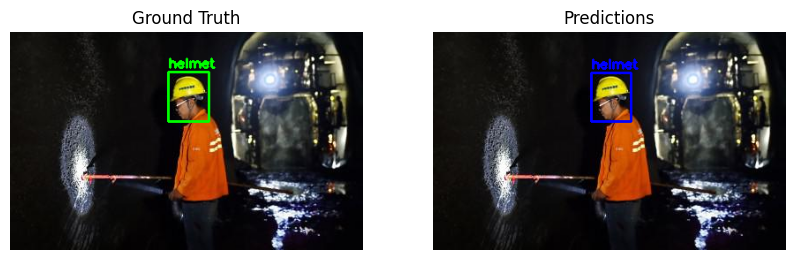

Skipping invalid class ID: 2
Skipping invalid class ID: 2
Skipping invalid class ID: 2


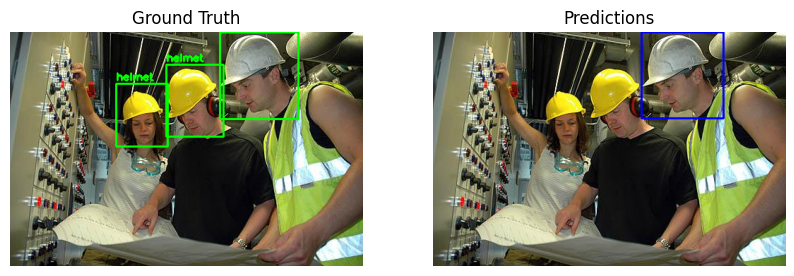

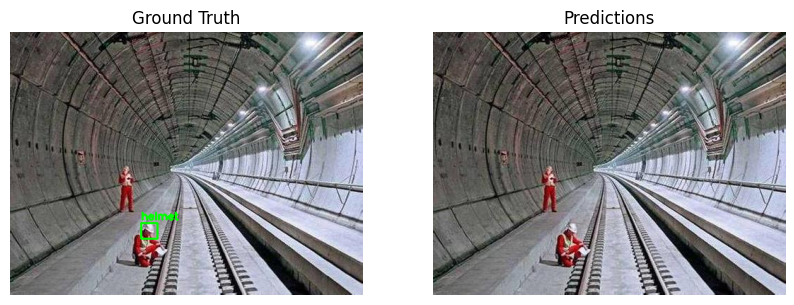

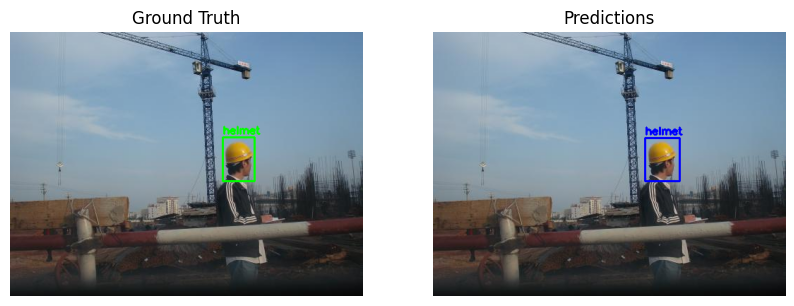

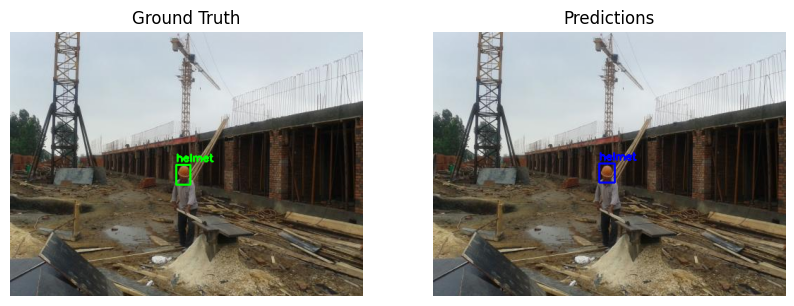

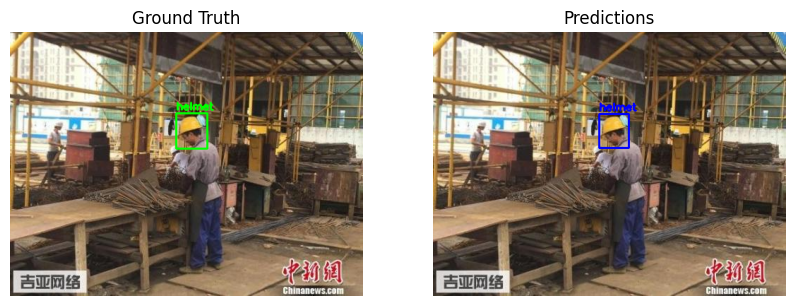

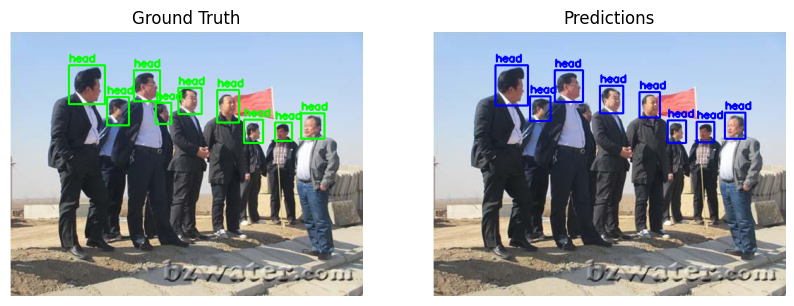

In [22]:
def load_class_names(yaml_path):
    """
    Load class names from a YAML file.

    Args:
        yaml_path (str): Path to the YAML file containing class names.

    Returns:
        list: List of class names.
    """
    with open(yaml_path, "r") as file:
        data_yaml = yaml.safe_load(file)
    return data_yaml.get("names", [])

def read_labels(label_path):
    """
    Read YOLO format labels from a text file.

    Args:
        label_path (str): Path to the label file.

    Returns:
        list: List of tuples containing class_id, x_center, y_center, width, height.
    """
    labels = []
    try:
        with open(label_path, "r") as file:
            lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])
            labels.append((class_id, x_center, y_center, width, height))
    except FileNotFoundError:
        print(f"Label file not found: {label_path}")
    return labels

def draw_boxes(image, boxes, color, class_names):
    """
    Draw bounding boxes on an image.

    Args:
        image (numpy.ndarray): The image on which to draw.
        boxes (list): List of bounding boxes in YOLO format.
        color (tuple): Color for the bounding boxes.
        class_names (list): List of class names.

    Returns:
        numpy.ndarray: Image with bounding boxes drawn.
    """
    h, w, _ = image.shape
    for box in boxes:
        class_id, x_center, y_center, width, height = box
        if class_id < 0 or class_id >= len(class_names):
            print(f"Skipping invalid class ID: {class_id}")
            continue
        x1 = int((x_center - width / 2) * w)
        y1 = int((y_center - height / 2) * h)
        x2 = int((x_center + width / 2) * w)
        y2 = int((y_center + height / 2) * h)
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, class_names[class_id], (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return image

def visualize_predictions(model_path, test_images_path, test_labels_path, yaml_path, num_images=5):
    """
    Visualize ground truth and predicted bounding boxes for test images.

    Args:
        model_path (str): Path to the trained YOLO model.
        test_images_path (str): Directory containing test images.
        test_labels_path (str): Directory containing test labels.
        yaml_path (str): Path to the YAML file with class names.
        num_images (int): Number of images to visualize.
    """
    # Load YOLO model
    model = YOLO(model_path)

    # Load class names
    class_names = load_class_names(yaml_path)
    print("Loaded class names:", class_names)

    # Get test images
    test_images = glob.glob(os.path.join(test_images_path, "*.jpg"))
    if not test_images:
        print(f"No images found in {test_images_path}")
        return

    # Run inference
    results = model.predict(source=test_images[:num_images], save=False)

    # Iterate over the selected number of images
    for img_path, result in zip(test_images[:num_images], results):
        img_name = os.path.basename(img_path)
        label_path = os.path.join(test_labels_path, img_name.replace(".jpg", ".txt"))

        # Read image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to read image: {img_path}")
            continue
        img_gt = img.copy()
        img_pred = img.copy()

        # Read ground truth labels
        gt_boxes = read_labels(label_path)
        if gt_boxes:
            img_gt = draw_boxes(img_gt, gt_boxes, (0, 255, 0), class_names)  # Green for GT

        # Get predictions
        pred_boxes = []
        for box in result.boxes.data:
            x1, y1, x2, y2, conf, class_id = box.tolist()
            class_id = int(class_id)
            if class_id < 0 or class_id >= len(class_names):
                print(f"Skipping invalid class ID: {class_id}")
                continue
            x_center = (x1 + x2) / 2 / img.shape[1]
            y_center = (y1 + y2) / 2 / img.shape[0]
            width = (x2 - x1) / img.shape[1]
            height = (y2 - y1) / img.shape[0]
            pred_boxes.append((class_id, x_center, y_center, width, height))

        img_pred = draw_boxes(img_pred, pred_boxes, (255, 0, 0), class_names)  # Red for Predictions

        # Show images side by side
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(cv2.cvtColor(img_gt, cv2.COLOR_BGR2RGB))
        axs[0].set_title("Ground Truth")
        axs[0].axis("off")

        axs[1].imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB))
        axs[1].set_title("Predictions")
        axs[1].axis("off")

        plt.show()

# Example usage
if __name__ == "__main__":
    visualize_predictions(
        model_path="runs/detect/train/weights/best.pt",
        test_images_path="dataset/test/images",
        test_labels_path="dataset/test/labels",
        yaml_path="my_data.yaml",
        num_images=10
    )


In [27]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [28]:
import shutil

# Define source and destination paths
source_path = 'runs/detect/train/weights/best.pt'
destination_path = '/content/drive/My Drive/ColabModels/best_model.pt'

# Create the destination directory if it doesn't exist
os.makedirs(os.path.dirname(destination_path), exist_ok=True)

# Copy the model file to Google Drive
shutil.copy(source_path, destination_path)


'/content/drive/My Drive/ColabModels/best_model.pt'